In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import os,os.path
import gensim,re #designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.

In [3]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for each in os.listdir(self.dirname):
            if each != '.DS_Store':
                logging.info('INITIATED: Processing sentences for '+each)
                with open(os.path.join(self.dirname,each,'sentences.txt'),'r', encoding='utf-8') as fin:
                    for line in fin:
                        review_text = re.sub("[^a-zA-Z]"," ", line)
                        yield review_text.split()

In [4]:
sentences = MySentences('./stackexchange')

In [5]:
from collections import defaultdict
d = defaultdict(lambda : 0)
for each in sentences:
    d[len(each)] += 1

2022-05-05 11:59:28,278 : INFO : INITIATED: Processing sentences for dataset1
2022-05-05 11:59:28,557 : INFO : INITIATED: Processing sentences for dataset35
2022-05-05 11:59:28,584 : INFO : INITIATED: Processing sentences for dataset41
2022-05-05 11:59:28,645 : INFO : INITIATED: Processing sentences for dataset5
2022-05-05 11:59:29,602 : INFO : INITIATED: Processing sentences for dataset11
2022-05-05 11:59:29,616 : INFO : INITIATED: Processing sentences for dataset23
2022-05-05 11:59:29,693 : INFO : INITIATED: Processing sentences for dataset12
2022-05-05 11:59:29,711 : INFO : INITIATED: Processing sentences for dataset34
2022-05-05 11:59:29,739 : INFO : INITIATED: Processing sentences for dataset32
2022-05-05 11:59:29,873 : INFO : INITIATED: Processing sentences for dataset14
2022-05-05 11:59:29,941 : INFO : INITIATED: Processing sentences for dataset7
2022-05-05 11:59:29,944 : INFO : INITIATED: Processing sentences for dataset43
2022-05-05 11:59:30,041 : INFO : INITIATED: Processing 

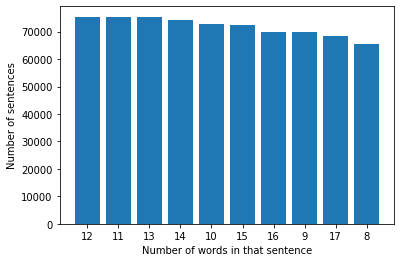

In [13]:

#Identifying proper context parameter for word2vec model training.
import operator
d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:10])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
plt.ylabel("Number of sentences")
plt.xlabel("Number of words in that sentence")
plt.savefig('context.jpg')
plt.show()

In [10]:
d.items()

dict_items([(12, 75430), (11, 75402), (13, 75160), (14, 74386), (10, 72767), (15, 72384), (16, 70030), (9, 69816), (17, 68471), (8, 65608)])

In [11]:
d.values()

dict_values([75430, 75402, 75160, 74386, 72767, 72384, 70030, 69816, 68471, 65608])

In [12]:
# Set values for various parameters
#size = 300             # Word vector dimensionality                      
#min_count = 10         # Minimum word count                        
#workers = 4            # Number of threads to run in parallel
#window = 15           # Context window size                                                                                    
#sample = 1e-3          # Downsample setting for frequent words


model = gensim.models.Word2Vec(sentences,  workers=4, size=300, min_count = 1, window = 15, sample = 1e-3)

2022-05-05 12:22:19,679 : INFO : collecting all words and their counts
2022-05-05 12:22:19,682 : INFO : INITIATED: Processing sentences for dataset1
2022-05-05 12:22:19,684 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-05 12:22:19,772 : INFO : PROGRESS: at sentence #10000, processed 180942 words, keeping 11086 word types
2022-05-05 12:22:19,847 : INFO : PROGRESS: at sentence #20000, processed 355460 words, keeping 15490 word types
2022-05-05 12:22:19,922 : INFO : PROGRESS: at sentence #30000, processed 534419 words, keeping 18820 word types
2022-05-05 12:22:20,001 : INFO : PROGRESS: at sentence #40000, processed 709819 words, keeping 21553 word types
2022-05-05 12:22:20,080 : INFO : PROGRESS: at sentence #50000, processed 890440 words, keeping 23773 word types
2022-05-05 12:22:20,119 : INFO : INITIATED: Processing sentences for dataset35
2022-05-05 12:22:20,161 : INFO : INITIATED: Processing sentences for dataset41
2022-05-05 12:22:20,163 : INFO : P

2022-05-05 12:22:24,791 : INFO : PROGRESS: at sentence #630000, processed 11438638 words, keeping 103072 word types
2022-05-05 12:22:24,869 : INFO : PROGRESS: at sentence #640000, processed 11632345 words, keeping 103431 word types
2022-05-05 12:22:24,951 : INFO : PROGRESS: at sentence #650000, processed 11828787 words, keeping 103832 word types
2022-05-05 12:22:25,032 : INFO : PROGRESS: at sentence #660000, processed 12021444 words, keeping 104178 word types
2022-05-05 12:22:25,113 : INFO : PROGRESS: at sentence #670000, processed 12217038 words, keeping 104547 word types
2022-05-05 12:22:25,196 : INFO : PROGRESS: at sentence #680000, processed 12408917 words, keeping 104946 word types
2022-05-05 12:22:25,277 : INFO : PROGRESS: at sentence #690000, processed 12601029 words, keeping 105273 word types
2022-05-05 12:22:25,368 : INFO : PROGRESS: at sentence #700000, processed 12798467 words, keeping 105673 word types
2022-05-05 12:22:25,457 : INFO : PROGRESS: at sentence #710000, processe

2022-05-05 12:22:30,730 : INFO : PROGRESS: at sentence #1340000, processed 24776636 words, keeping 124756 word types
2022-05-05 12:22:30,813 : INFO : PROGRESS: at sentence #1350000, processed 24964051 words, keeping 125045 word types
2022-05-05 12:22:30,896 : INFO : PROGRESS: at sentence #1360000, processed 25154425 words, keeping 125250 word types
2022-05-05 12:22:30,980 : INFO : PROGRESS: at sentence #1370000, processed 25346181 words, keeping 125514 word types
2022-05-05 12:22:31,061 : INFO : PROGRESS: at sentence #1380000, processed 25535643 words, keeping 125804 word types
2022-05-05 12:22:31,146 : INFO : PROGRESS: at sentence #1390000, processed 25729757 words, keeping 126066 word types
2022-05-05 12:22:31,228 : INFO : PROGRESS: at sentence #1400000, processed 25920667 words, keeping 126351 word types
2022-05-05 12:22:31,309 : INFO : PROGRESS: at sentence #1410000, processed 26111615 words, keeping 126592 word types
2022-05-05 12:22:31,391 : INFO : PROGRESS: at sentence #1420000,

2022-05-05 12:22:34,839 : INFO : PROGRESS: at sentence #1860000, processed 33720732 words, keeping 145053 word types
2022-05-05 12:22:34,883 : INFO : INITIATED: Processing sentences for dataset33
2022-05-05 12:22:34,909 : INFO : collected 145245 word types from a corpus of 33867415 raw words and 1868437 sentences
2022-05-05 12:22:34,910 : INFO : Loading a fresh vocabulary
2022-05-05 12:22:35,193 : INFO : effective_min_count=1 retains 145245 unique words (100% of original 145245, drops 0)
2022-05-05 12:22:35,194 : INFO : effective_min_count=1 leaves 33867415 word corpus (100% of original 33867415, drops 0)
2022-05-05 12:22:35,531 : INFO : deleting the raw counts dictionary of 145245 items
2022-05-05 12:22:35,534 : INFO : sample=0.001 downsamples 47 most-common words
2022-05-05 12:22:35,535 : INFO : downsampling leaves estimated 25230764 word corpus (74.5% of prior 33867415)
2022-05-05 12:22:35,798 : INFO : estimated required memory for 145245 words and 300 dimensions: 421210500 bytes
20

2022-05-05 12:23:34,062 : INFO : INITIATED: Processing sentences for dataset40
2022-05-05 12:23:34,249 : INFO : INITIATED: Processing sentences for dataset29
2022-05-05 12:23:34,290 : INFO : INITIATED: Processing sentences for dataset9
2022-05-05 12:23:34,390 : INFO : INITIATED: Processing sentences for dataset39
2022-05-05 12:23:34,454 : INFO : INITIATED: Processing sentences for dataset27
2022-05-05 12:23:34,689 : INFO : EPOCH 1 - PROGRESS: at 95.60% examples, 597562 words/s, in_qsize 5, out_qsize 2
2022-05-05 12:23:35,093 : INFO : INITIATED: Processing sentences for dataset2
2022-05-05 12:23:35,184 : INFO : INITIATED: Processing sentences for dataset10
2022-05-05 12:23:35,699 : INFO : EPOCH 1 - PROGRESS: at 97.77% examples, 595509 words/s, in_qsize 7, out_qsize 0
2022-05-05 12:23:35,768 : INFO : INITIATED: Processing sentences for dataset18
2022-05-05 12:23:36,482 : INFO : INITIATED: Processing sentences for dataset33
2022-05-05 12:23:36,616 : INFO : worker thread finished; awaiting

2022-05-05 12:24:16,112 : INFO : EPOCH 2 - PROGRESS: at 93.26% examples, 599428 words/s, in_qsize 7, out_qsize 2
2022-05-05 12:24:16,209 : INFO : INITIATED: Processing sentences for dataset20
2022-05-05 12:24:16,400 : INFO : INITIATED: Processing sentences for dataset40
2022-05-05 12:24:16,569 : INFO : INITIATED: Processing sentences for dataset29
2022-05-05 12:24:16,636 : INFO : INITIATED: Processing sentences for dataset9
2022-05-05 12:24:16,657 : INFO : INITIATED: Processing sentences for dataset39
2022-05-05 12:24:16,769 : INFO : INITIATED: Processing sentences for dataset27
2022-05-05 12:24:17,127 : INFO : EPOCH 2 - PROGRESS: at 95.95% examples, 598840 words/s, in_qsize 7, out_qsize 0
2022-05-05 12:24:17,373 : INFO : INITIATED: Processing sentences for dataset2
2022-05-05 12:24:17,402 : INFO : INITIATED: Processing sentences for dataset10
2022-05-05 12:24:17,930 : INFO : INITIATED: Processing sentences for dataset18
2022-05-05 12:24:18,145 : INFO : EPOCH 2 - PROGRESS: at 98.40% ex

2022-05-05 12:24:57,598 : INFO : INITIATED: Processing sentences for dataset15
2022-05-05 12:24:57,792 : INFO : INITIATED: Processing sentences for dataset17
2022-05-05 12:24:57,838 : INFO : INITIATED: Processing sentences for dataset16
2022-05-05 12:24:58,111 : INFO : INITIATED: Processing sentences for dataset20
2022-05-05 12:24:58,288 : INFO : INITIATED: Processing sentences for dataset40
2022-05-05 12:24:58,404 : INFO : EPOCH 3 - PROGRESS: at 94.29% examples, 603018 words/s, in_qsize 7, out_qsize 3
2022-05-05 12:24:58,450 : INFO : INITIATED: Processing sentences for dataset29
2022-05-05 12:24:58,498 : INFO : INITIATED: Processing sentences for dataset9
2022-05-05 12:24:58,573 : INFO : INITIATED: Processing sentences for dataset39
2022-05-05 12:24:58,641 : INFO : INITIATED: Processing sentences for dataset27
2022-05-05 12:24:59,256 : INFO : INITIATED: Processing sentences for dataset2
2022-05-05 12:24:59,321 : INFO : INITIATED: Processing sentences for dataset10
2022-05-05 12:24:59,

2022-05-05 12:25:38,821 : INFO : INITIATED: Processing sentences for dataset19
2022-05-05 12:25:39,007 : INFO : EPOCH 4 - PROGRESS: at 90.29% examples, 598125 words/s, in_qsize 7, out_qsize 0
2022-05-05 12:25:39,812 : INFO : INITIATED: Processing sentences for dataset15
2022-05-05 12:25:39,963 : INFO : INITIATED: Processing sentences for dataset17
2022-05-05 12:25:40,009 : INFO : EPOCH 4 - PROGRESS: at 92.89% examples, 598908 words/s, in_qsize 8, out_qsize 0
2022-05-05 12:25:40,012 : INFO : INITIATED: Processing sentences for dataset16
2022-05-05 12:25:40,272 : INFO : INITIATED: Processing sentences for dataset20
2022-05-05 12:25:40,456 : INFO : INITIATED: Processing sentences for dataset40
2022-05-05 12:25:40,651 : INFO : INITIATED: Processing sentences for dataset29
2022-05-05 12:25:40,703 : INFO : INITIATED: Processing sentences for dataset9
2022-05-05 12:25:40,744 : INFO : INITIATED: Processing sentences for dataset39
2022-05-05 12:25:40,847 : INFO : INITIATED: Processing sentences

2022-05-05 12:26:19,405 : INFO : INITIATED: Processing sentences for dataset36
2022-05-05 12:26:20,296 : INFO : EPOCH 5 - PROGRESS: at 88.99% examples, 603594 words/s, in_qsize 8, out_qsize 0
2022-05-05 12:26:20,637 : INFO : INITIATED: Processing sentences for dataset19
2022-05-05 12:26:21,338 : INFO : EPOCH 5 - PROGRESS: at 91.48% examples, 603095 words/s, in_qsize 7, out_qsize 4
2022-05-05 12:26:21,593 : INFO : INITIATED: Processing sentences for dataset15
2022-05-05 12:26:21,767 : INFO : INITIATED: Processing sentences for dataset17
2022-05-05 12:26:21,848 : INFO : INITIATED: Processing sentences for dataset16
2022-05-05 12:26:22,128 : INFO : INITIATED: Processing sentences for dataset20
2022-05-05 12:26:22,322 : INFO : INITIATED: Processing sentences for dataset40
2022-05-05 12:26:22,341 : INFO : EPOCH 5 - PROGRESS: at 94.10% examples, 603222 words/s, in_qsize 8, out_qsize 1
2022-05-05 12:26:22,487 : INFO : INITIATED: Processing sentences for dataset29
2022-05-05 12:26:22,590 : INF

In [15]:
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "stackexchange_model"
model.save(model_name)

2022-05-05 12:46:03,612 : INFO : saving Word2Vec object under stackexchange_model, separately None
2022-05-05 12:46:03,615 : INFO : storing np array 'vectors' to stackexchange_model.wv.vectors.npy
2022-05-05 12:46:03,698 : INFO : not storing attribute vectors_norm
2022-05-05 12:46:03,699 : INFO : storing np array 'syn1neg' to stackexchange_model.trainables.syn1neg.npy
2022-05-05 12:46:03,773 : INFO : not storing attribute cum_table
2022-05-05 12:46:03,946 : INFO : saved stackexchange_model


In [16]:
print(len(model.wv.vocab))

145245


In [22]:
#Odd one out.
#self.wv.doesnt_match()
print (model.wv.doesnt_match("java html javascript".split()))
print (model.wv.doesnt_match("java python html javascript".split()))
print (model.wv.doesnt_match("server linux windows redhat".split()))
print (model.wv.doesnt_match("cool hot big".split()))
print (model.wv.doesnt_match("internship job training".split()))

2022-05-05 14:05:27,241 : INFO : precomputing L2-norms of word weight vectors


html
html
redhat
big
training


/home/saifullah/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [23]:
#man is to women as king is to ______
#self.wv.most_similar()
print (model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
#css is to html as java is to _______
print (model.wv.most_similar(positive=['java', 'html'], negative=['css'], topn=1))
#berlin is to germany as paris is to _________
print (model.wv.most_similar(positive=['paris', 'germany'], negative=['berlin'], topn=1))
#he is to his as she is to _______
print (model.wv.most_similar(positive=['she', 'his'], negative=['he'], topn=1))
#windows is to microsoft as osx is to __________
print (model.wv.most_similar(positive=['osx', 'microsoft'], negative=['windows'], topn=1))

[('queen', 0.6101117134094238)]
[('python', 0.6137335300445557)]
[('france', 0.7396118640899658)]
[('her', 0.5961595773696899)]
[('indesign', 0.5518197417259216)]


In [24]:
print(model.similarity('wallet','purse'))
print(model.similarity('wallet','android'))
print(model.similarity('windows','microsoft'))
print(model.similarity('cyanogenmod','android'))

0.34643003
0.17077523
0.46678308
0.18304482


/tmp/ipykernel_10101/2345336939.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(model.similarity('wallet','android'))
/tmp/ipykernel_10101/2345336939.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(model.similarity('wallet','purse'))
/tmp/ipykernel_10101/2345336939.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(model.similarity('windows','microsoft'))
/tmp/ipykernel_10101/2345336939.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(model.similarity('cyanogenmod','android'))


In [25]:
model = gensim.models.Word2Vec.load('stackexchange_model')
#model.train(more_sentences)

2022-05-05 14:06:58,794 : INFO : loading Word2Vec object from stackexchange_model
2022-05-05 14:06:59,473 : INFO : loading wv recursively from stackexchange_model.wv.* with mmap=None
2022-05-05 14:06:59,474 : INFO : loading vectors from stackexchange_model.wv.vectors.npy with mmap=None
2022-05-05 14:06:59,559 : INFO : setting ignored attribute vectors_norm to None
2022-05-05 14:06:59,560 : INFO : loading vocabulary recursively from stackexchange_model.vocabulary.* with mmap=None
2022-05-05 14:06:59,562 : INFO : loading trainables recursively from stackexchange_model.trainables.* with mmap=None
2022-05-05 14:06:59,563 : INFO : loading syn1neg from stackexchange_model.trainables.syn1neg.npy with mmap=None
2022-05-05 14:06:59,644 : INFO : setting ignored attribute cum_table to None
2022-05-05 14:06:59,645 : INFO : loaded stackexchange_model
